# Imports

In [2]:
!pip install -q tfds-nightly tensorflow-datasets tensorflow matplotlib

In [3]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load dataset

Import dataset

In [5]:
ds = tfds.load('deep_weeds', batch_size = -1, as_supervised= True)

In [15]:
images, labels = ds['train']

# Naive KNN

In [19]:
print(images.shape)

(17509, 256, 256, 3)


We're definitely not going to run KNN on 256\*256\*3, so let's downres it to 32\*32

In [58]:
resized_images = tf.image.resize(images, [32,32])
image_vectors = tf.reshape(resized_images, [-1,3072])

Here's a sample of an image after downres

Text(0.5, 1.0, 'After')

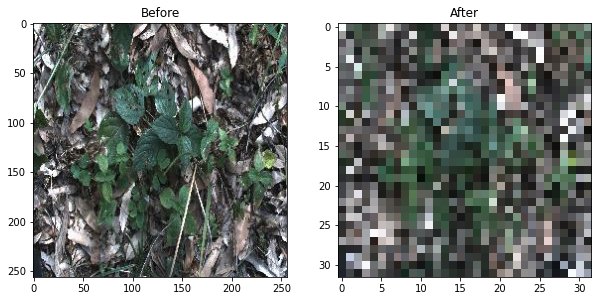

In [66]:
before = images[0]
after = tf.cast(resized_images, tf.uint8)[0]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,2,1)
plt.imshow(before)
ax.set_title("Before")

ax = fig.add_subplot(1,2,2)
plt.imshow(after)
ax.set_title("After")

The result is pretty undiscernible, so expected accuracy should be quite bad

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_vectors.numpy(), labels.numpy(), test_size=0.2, random_state=0)

In [45]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
knn_model = knn.fit(X_train, y_train)
print('kNN accuracy for training set: %f' % knn_model.score(X_train, y_train))
print('kNN accuracy for test set: %f' % knn_model.score(X_test, y_test))

kNN accuracy for training set: 1.000000
kNN accuracy for test set: 0.388635
